In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

In [3]:
df = pd.read_excel("..\Data/DatosMadrid.xlsx")



In [4]:
df['Barrios'].fillna("Desconocido", inplace=True)
media=df[["Precio feb 2021"]].mean()
media[0]
df["Precio feb 2021"].fillna(media[0],inplace=True)

In [5]:
columnas = ['Distrito', 
            'Densidad', 
            'Superficie', 
            'Delitos intervencion Policial', 
            'Delitos contra la seguridad vial', 
            '16-64 años', 
            'Seguridad Percibida de dia', 
            'Seguridad Percibida de noche',
            'Precio de Febrero 2021',
            'Calidad del aire']
df_distritos = pd.DataFrame(columns=columnas)

In [6]:
df_distritos

,Distrito,Densidad,Superficie,Delitos intervencion Policial,Delitos contra la seguridad vial,16-64 años,Seguridad Percibida de dia,Seguridad Percibida de noche,Precio de Febrero 2021,Calidad del aire


In [25]:
df[df["Distrito"]=="Centro"].Tren.sum()

2.0

In [7]:
def porDistritos(df,i)->dict:
    dic={}
    nombre=df.Distrito.unique()[i]
    poblacion=df[df["Distrito"]==nombre].Población.sum()
    densidad=df[df["Distrito"]==nombre].Densidad.sum()
    superficie=df[df["Distrito"]==nombre].Superficie.sum()
    int_pol=df[df["Distrito"]==nombre]["Delitos intervencion policial"].sum()
    seg_vial=df[df["Distrito"]==nombre]["Delitos contra seguridad vial"].sum()
    juventud=df[df["Distrito"]==nombre]["16-64 años"].sum()
    seg_dia=df[df["Distrito"]==nombre]["Seguridad Percibida día"].mean()
    #print("pasa de aqui",i)
    seg_noche=df[df["Distrito"]==nombre]["Seguridad Percibida de Noche"].mean()
    precio_feb=df[df["Distrito"]==nombre]["Precio feb 2021"].sum()
    if(df[df["Distrito"]==nombre]["Calidad del aire"].unique()[0]=='Muy bueno'):
        caliAire=10
    elif(df[df["Distrito"]==nombre]["Calidad del aire"].unique()[0]=='Regular'):
        caliAire=5
    else:
        caliAire=2
    tren=df[df["Distrito"]==nombre].Tren.sum()
    aut=df[df["Distrito"]==nombre].Autobus.sum()
    metro=df[df["Distrito"]==nombre].Metro.sum()
    
    
    
    dic={    "Distrito":nombre,
             "Densidad":densidad,
             "Superficie":superficie,
             "Poblacion":poblacion,
             "Delitos intervencion Policial":int_pol,
             "Delitos contra la seguridad vial":seg_vial,
             "16-64 años":juventud,
             "Seguridad Percibida de dia":seg_dia,
             "Seguridad Percibida de noche":seg_noche,
             "Precio de Febrero 2021":precio_feb,
             "Calidad del aire":caliAire,
             "Metro":metro,
             "Tren":tren,
             "Autobus":aut}
    
    return dic

In [8]:
for i in range(0,21):
    df_distritos = df_distritos.append(porDistritos(df,i), ignore_index=True)
    

C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3165183898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_distritos = df_distritos.append(porDistritos(df,i), ignore_index=True)
C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3165183898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_distritos = df_distritos.append(porDistritos(df,i), ignore_index=True)
C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3165183898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_distritos = df_distritos.append(porDistritos(df,i), ignore_index=True)
C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3165183898.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [31]:
df_distritos

,Distrito,Densidad,Superficie,Delitos intervencion Policial,Delitos contra la seguridad vial,16-64 años,Seguridad Percibida de dia,Seguridad Percibida de noche,Precio de Febrero 2021,Calidad del aire,Poblacion,Metro,Tren,Autobus
0,Centro,1832.766625,10.456,3870,620,215096,82.7,69.8,34644.000000,10,281982.0,6.0,2.0,6.0
1,Arganzuela,25079.030853,12.956,594,206,212290,84.8,68.6,31700.000000,5,311320.0,6.0,3.0,7.0
2,Retiro,23572.067785,10.896,359,228,148502,81.1,66.6,33800.000000,10,241746.0,6.0,0.0,6.0
3,Salamanca,28553.565374,10.768,1453,318,192392,81.7,73.0,40781.000000,2,296810.0,6.0,1.0,6.0
4,Chamartin,16838.385670,18.336,629,305,185650,86.8,73.0,35003.000000,10,296042.0,6.0,1.0,6.0
5,Tetuán,30563.223008,10.772,1038,368,224000,80.8,60.4,25729.000000,2,323974.0,6.0,1.0,6.0
6,Chamberí,31041.629757,9.401,515,239,183938,81.4,75.2,36491.000000,2,282263.0,6.0,0.0,6.0
7,Fuencarral-El pardo,1813.297704,475.786,449,256,306216,73.5,67.3,30114.000000,10,500589.0,6.0,3.0,8.0
8,Moncloa-Aravaca,3151.383369,93.168,563,285,155432,83.5,70.5,29693.000000,10,243423.0,6.0,2.0,7.0
9,Latina,10261.970864,50.849,737,402,306902,72.2,54.4,17744.000000,2,484278.0,7.0,5.0,7.0


PARA EL GRAFICO VOY AJUSTAR ALGUNOS NOMBRES COMPUESTOS PARA PODER VERLOS MEJOR


In [11]:
df_distritos[["Distrito"]]

,Distrito
0,Centro
1,Arganzuela
2,Retiro
3,Salamanca
4,Chamartin
5,Tetuán
6,Chamberí
7,Fuencarral
8,Moncloa-A
9,Latina


In [10]:
df_distritos.Distrito.iloc[7]="Fuencarral"
df_distritos.Distrito.iloc[8]="Moncloa-A"
df_distritos.Distrito.iloc[12]="P.Vallecas"
df_distritos.Distrito.iloc[14]="C.Lineal"
df_distritos.Distrito.iloc[17]="V.Vallecas"
df_distritos.Distrito.iloc[19]="SB-Canillejas"

C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3785267528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distritos.Distrito.iloc[7]="Fuencarral"
C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3785267528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distritos.Distrito.iloc[8]="Moncloa-A"
C:\Users\Danie\AppData\Local\Temp\ipykernel_15408\3785267528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distritos.Di

GRAFICOS POR DISTRITOS

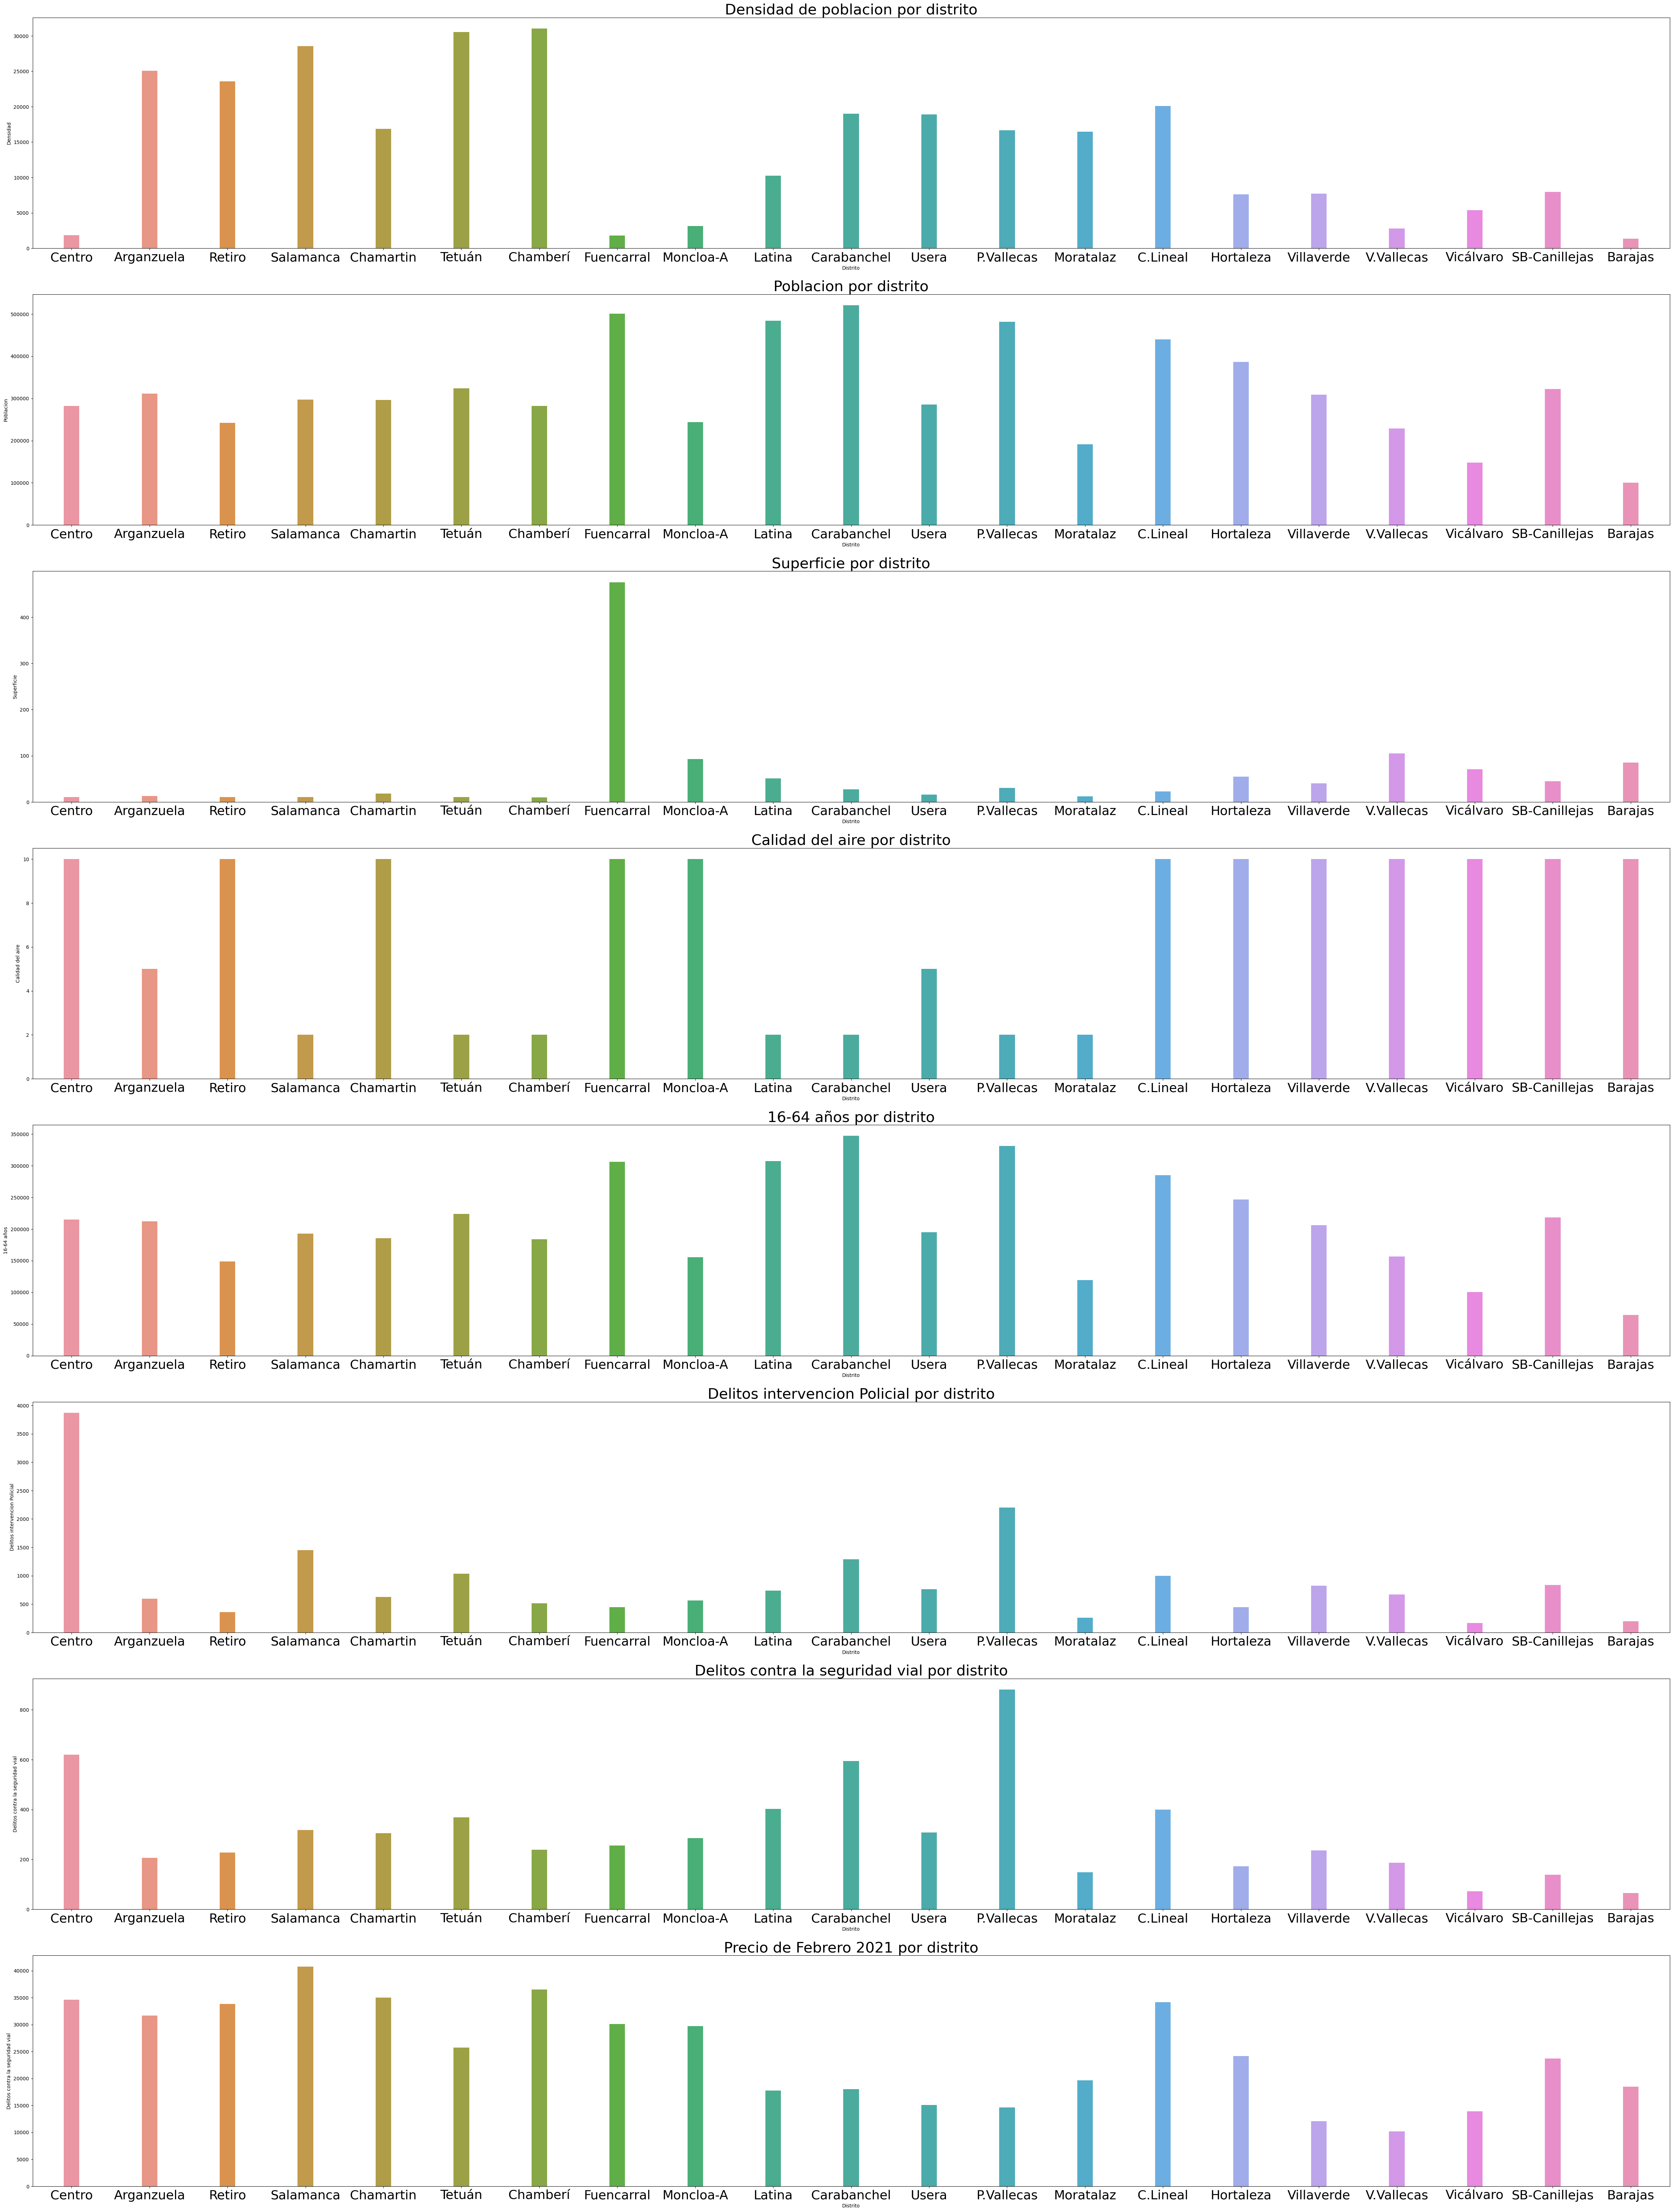

In [12]:
fig, axes = plt.subplots(8, 1, figsize=(60, 80))
#plt.xticks(fontsize=10, fontweight='bold')
sns.barplot(x = "Distrito", 
            y = "Densidad", 
            width=0.2,
            data = df_distritos,
            ax=axes[0]) 
axes[0].set_title("Densidad de poblacion por distrito", fontsize=30)
axes[0].set_xlabel("Distrito")
axes[0].set_ylabel("Densidad")
sns.barplot(x = "Distrito", 
            y = "Poblacion",
            width=0.2,
            data = df_distritos,
            ax=axes[1]) 
axes[1].set_title("Poblacion por distrito", fontsize=30)
axes[1].set_xlabel("Distrito")
axes[1].set_ylabel("Poblacion")
sns.barplot(x = "Distrito", 
            y = "Superficie",
            width=0.2,
            data = df_distritos,
            ax=axes[2]) 
axes[2].set_title("Superficie por distrito", fontsize=30)
axes[2].set_xlabel("Distrito")
axes[2].set_ylabel("Superficie")
sns.barplot(x = "Distrito", 
            y = "Calidad del aire",
            width=0.2,
            data = df_distritos,
            ax=axes[3]) 
axes[3].set_title("Calidad del aire por distrito", fontsize=30)
axes[3].set_xlabel("Distrito")
axes[3].set_ylabel("Calidad del aire")
sns.barplot(x = "Distrito", 
            y = "16-64 años",
            width=0.2,
            data = df_distritos,
            ax=axes[4]) 
axes[4].set_title("16-64 años por distrito", fontsize=30)
axes[4].set_xlabel("Distrito")
axes[4].set_ylabel("16-64 años")
sns.barplot(x = "Distrito", 
            y = "Delitos intervencion Policial",
            width=0.2,
            data = df_distritos,
            ax=axes[5]) 
axes[5].set_title("Delitos intervencion Policial por distrito", fontsize=30)
axes[5].set_xlabel("Distrito")
axes[5].set_ylabel("Delitos intervencion Policial")
sns.barplot(x = "Distrito", 
            y = "Delitos contra la seguridad vial",
            width=0.2,
            data = df_distritos,
            ax=axes[6]) 
axes[6].set_title("Delitos contra la seguridad vial por distrito", fontsize=30)
axes[6].set_xlabel("Distrito")
axes[6].set_ylabel("Delitos contra la seguridad vial")
sns.barplot(x = "Distrito", 
            y = "Precio de Febrero 2021",
            width=0.2,
            data = df_distritos,
            ax=axes[7]) 
axes[7].set_title("Precio de Febrero 2021 por distrito", fontsize=30)
axes[7].set_xlabel("Distrito")
axes[7].set_ylabel("Delitos contra la seguridad vial")
for ax in axes:
    for item in ax.get_xticklabels():
        item.set_fontsize(26)

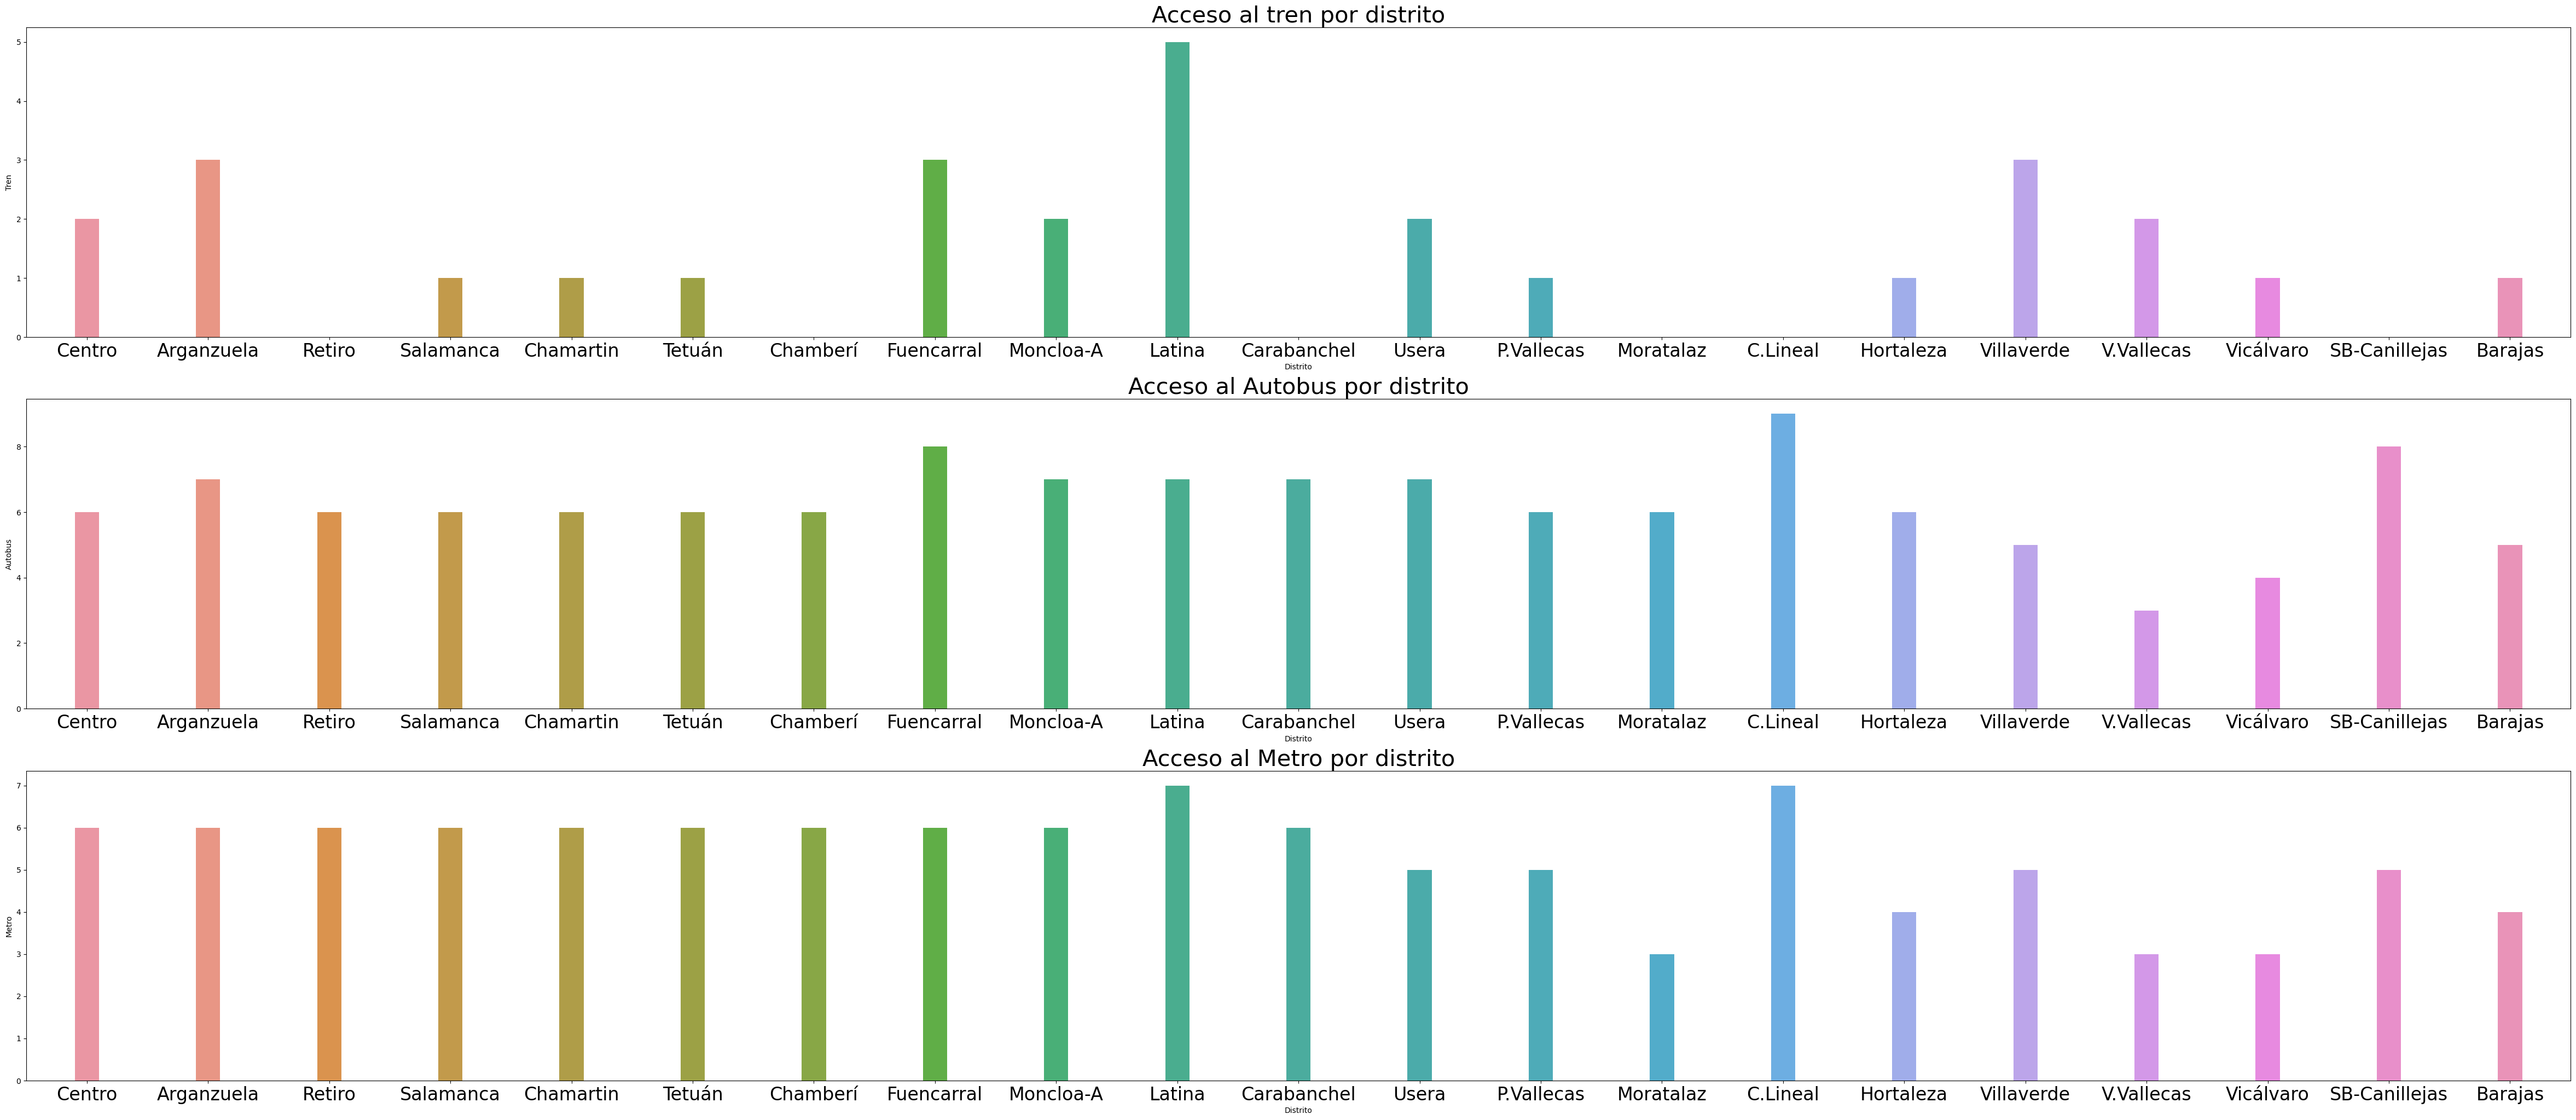

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(60, 25))
#plt.xticks(fontsize=10, fontweight='bold')
sns.barplot(x = "Distrito", 
            y = "Tren", 
            width=0.2,
            data = df_distritos,
            ax=axes[0]) 
axes[0].set_title("Acceso al tren por distrito", fontsize=30)
axes[0].set_xlabel("Distrito")
axes[0].set_ylabel("Tren")
sns.barplot(x = "Distrito", 
            y = "Autobus", 
            width=0.2,
            data = df_distritos,
            ax=axes[1]) 
axes[1].set_title("Acceso al Autobus por distrito", fontsize=30)
axes[1].set_xlabel("Distrito")
axes[1].set_ylabel("Autobus")
sns.barplot(x = "Distrito", 
            y = "Metro", 
            width=0.2,
            data = df_distritos,
            ax=axes[2]) 
axes[2].set_title("Acceso al Metro por distrito", fontsize=30)
axes[2].set_xlabel("Distrito")
axes[2].set_ylabel("Metro")
for ax in axes:
    for item in ax.get_xticklabels():
        item.set_fontsize(24)


- CONCLUSIONES

DENSIDAD, SUPERFICIE, POBLACIÓN Y CALIDAD DEL AIRE

Al observar nuevamente, al igual que en el caso del distrito central, notamos que no existen correlaciones lineales evidentes. Por ejemplo, en Chamberí, se destaca una densidad de población alta, a pesar de contar con una superficie relativamente reducida y una población media. Esto indica que la gente se encuentra más concentrada en un espacio físico más limitado.

Vamos a analizar los tres casos más destacados:

Densidad en Chamberí: Como mencionamos anteriormente, Chamberí destaca por su densidad poblacional.

Población en Carabanchel: Carabanchel presenta una densidad de población media-alta, pero su superficie es notablemente reducida, pese a ser la que tiene mas poblacion.

Fuencarral: Fuencarral se caracteriza por tener tanto una alta tasa de superficie como una población considerable, aunque su densidad poblacional es baja. Esto sugiere una distribución espaciosa de la población.

En cuanto a la calidad del aire, se observan variaciones interesantes. Aunque lo lógico sería que una mayor población y densidad, junto con una menor superficie, resulten en una calidad del aire inferior, los datos revelan que esta relación no siempre se cumple. Un ejemplo destacado es Ciudad Lineal, que posee una población y densidad medio-altas, junto con una superficie reducida, pero, paradójicamente, su índice de calidad del aire es muy alto.



In [13]:
df_distritos[df_distritos["Distrito"]=="Chamberí"][["Poblacion","Densidad","Superficie"]]

,Poblacion,Densidad,Superficie
6,282263.0,31041.629757,9.401


In [14]:
df_distritos[df_distritos["Distrito"]=="Carabanchel"][["Poblacion","Densidad","Superficie"]]

,Poblacion,Densidad,Superficie
10,520392.0,19021.828241,27.672


In [15]:
df_distritos[df_distritos["Distrito"]=="Fuencarral"][["Poblacion","Densidad","Superficie"]]

,Poblacion,Densidad,Superficie
7,500589.0,1813.297704,475.786


- DELITOS 
Siguen siendo correlativos con sus distinciones, en el del centro de madrid se pudo apreciar que normalmente
la mayor tasa de delitos estaba en intervencion policial pero sin embargo aqui se puede apreciar que hay
algunos distritos que despuntan en delitos contra la seguridad vial como el puente de vallecas

El centro de Madrid es la que mas desctaca en el caso de tener una poblacion menor y un numero alto de delitos registrados

In [17]:
df_distritos[["Distrito","Poblacion","Delitos intervencion Policial","Delitos contra la seguridad vial"]].sort_values("Poblacion", ascending=False)

,Distrito,Poblacion,Delitos intervencion Policial,Delitos contra la seguridad vial
10,Carabanchel,520392.0,1287,594
7,Fuencarral,500589.0,449,256
9,Latina,484278.0,737,402
12,P.Vallecas,481734.0,2199,880
14,C.Lineal,439734.0,998,400
15,Hortaleza,386528.0,447,173
5,Tetuán,323974.0,1038,368
19,SB-Canillejas,322444.0,835,138
1,Arganzuela,311320.0,594,206
16,Villaverde,308636.0,824,236


Finalmente segun los datos obtenidos se puede determinar que la relacion de delitos 
tendria una tendencia lineal por "zonas/barrios" las cuales en estos datos estan agrupadas.
Si  evaluamos la correlacion por distrito, podemos observar que no tendria y que no
depende de su poblacion.

- TRANSPORTES

Se observa que el acceso al tren por distritos es bastante menor al resto de transportes teniendo
metro y autobus una alta accesibilidad en todos los Distritos

In [60]:
df_distritos[["Distrito","Tren","Autobus","Metro"]].head(5)

,Distrito,Tren,Autobus,Metro
0,Centro,2.0,6.0,6.0
1,Arganzuela,3.0,7.0,6.0
2,Retiro,0.0,6.0,6.0
3,Salamanca,1.0,6.0,6.0
4,Chamartin,1.0,6.0,6.0


In [64]:
tren=df_distritos["Tren"].sum()
metro=df_distritos["Metro"].sum()
autobus=df_distritos["Autobus"].sum()

In [67]:
print(f'La suma de la accesibilidad por distritos es metro:  {metro}, autobus:  {autobus},  tren : {tren}')

La suma de la accesibilidad por distritos es metro:  111.0, autobus:  131.0,  tren : 29.0


- CONCLUSIÓN FINAL

En febrero de 2021, el precio de vivir en un barrio de Madrid no siempre está relacionado de manera directa con la densidad de población y la cantidad de habitantes. Los datos sugieren que no necesariamente donde los costos de vida son más bajos, la densidad y población son mayores.

Es importante destacar que las medidas de calidad del aire y la satisfacción y calidad de vida no siempre son fiables o reflejan una realidad positiva. Estos indicadores suelen asignarse de manera uniforme a todos los barrios del distrito, lo que puede no reflejar las variaciones reales entre áreas.

Segun https://airedemadrid.madrid.es/portal/site/calidadaire a fecha de hoy 25/10/2023 la calidad
del aire de Madrid centro y alrededores es "regular",dato muy relevante, esto es lo que se podria esperar dado que el centro de Madrid esta muy transitado y aunque se hayan tomado medidas para eliminar la 
produccion de polucion quizas no sean suficientes.

Para llevar a cabo un análisis más detallado de la efectividad de las medidas de reducción de la contaminación, podría ser útil realizar un estudio a largo plazo que compare los datos de calidad del aire a lo largo de varios años y evalúe si las medidas han tenido un impacto positivo en la reducción de la contaminación. Esto podría incluir la evaluación de emisiones de fuentes de contaminación, la implementación de políticas medioambientales y el monitoreo continuo de la calidad del aire.

Este tipo de análisis podría proporcionar información valiosa sobre el progreso en la mejora de la calidad del aire en el centro de Madrid y ayudar a determinar si se necesitan medidas adicionales o ajustes en las políticas medioambientales para lograr una mejor calidad del aire en el futuro. La calidad del aire es un tema importante para la salud pública y el medio ambiente, y la evaluación constante es esencial para garantizar un aire limpio y saludable en las zonas urbanas.


En la parte de delitos se observa que se pierde la exactitud de la medida y su correlacion cuando
agrupamos los datos por distritos, en el anterior caso expuesto en el que se habla solo del 
distrito del Centro y su barrios se observa que es correlativa de tal manera que contra mas
poblacion hay en un barrio mas delitos se registra mientras que este dato por distritos
no es correlativo.

En cuanto al acceso a los transportes públicos, se evidencia una distribución clara entre el metro y el autobús, mientras que el tren es el medio de transporte menos accesible en general. 


Este es un ejercicio realizado a traves de unos datos que nos facilitan en el bootcamp, la cercania
de los datos a la realidad de 2021 me es desconocida.

Sin embargo, las observaciones sirven de ejemplo de aprendizaje teniendo en cuenta que las variables
a observar serian bastantes mas numerosas y complejas lo que determina la importancia  de analizar los datos y la necesidad de considerar múltiples factores para comprender plenamente las dinámicas de una ciudad como Madrid.



